Goal of analysis script is to pull in Med-PC files from Pavlovian conditioning experiment and process for Pavlovian Conditioned Approach (PCA) parameters

Med PC program for pavlovian conditioning has the following event_stamps (array E):
-  Event stamps ( array E )
-   1   = Rt lever press/NP
-   2   = Lt lever press/NP
-   5   = Pellet reinforcement delivery
-   6   = Food tray head entry
-   7   = Right cue light on
-   8   = Left cue light on
-   9   = Right cue light off
-   10  = Left cue ight off
-   11  = Magazine tray light on
-   12  = Magazine tray light off
-   13  = Liquid delivery turns on
-   14  = Liquid delivery turns off
-   15  = ITI starts
-   16  = ITI ends
-   18  = Right lever extends
-   19  = Left lever extends
-   20  = Right lever retracts
-   21  = Left lever retracts
-   22  = CS on
-   23  = CS off
-   100 = Session termination
-   999 = Place holder - no event

Import modules. MedMod is self-created module for processing Med PC files

In [1]:
import numpy as np
import pandas as pd
import re
import os
from scipy import stats
from tkinter import filedialog
from tkinter import *
import MedMod as mm


# visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Open dialog box and prompt user to select directory containing directories of behavioral sessions

In [35]:
root = Tk()
root.directory = filedialog.askdirectory()
print (root.directory)

C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav


Use os module to create list of session directories (names of session directories are the same for both rounds)

In [36]:
pav_session_dirs = os.listdir(root.directory)
pav_session_dirs

['Pav1', 'Pav2', 'Pav3', 'Pav4', 'Pav5', 'Pav6', 'Pav7']

Loop through session directory names to create a path for session directories in each exp round

In [37]:
pav_dir_paths_1 = []
for directory in pav_session_dirs:
    path = root.directory + '/' + directory
    pav_dir_paths_1.append(path)

pav_dir_paths_1

['C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav1',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav2',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav3',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav4',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav5',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav6',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav7']

In [11]:
pav_dir_paths_2 = []
for directory in pav_session_dirs:
    path = root.directory + '/' + directory
    pav_dir_paths_2.append(path)

pav_dir_paths_2

['C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav1',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav2',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav3',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav4',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav5',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav6',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav7']

In [8]:
ext_session_dirs = os.listdir(root.directory)
ext_session_dirs

['Pav1', 'Pav2', 'Pav3', 'Pav4', 'Pav5', 'Pav6', 'Pav7']

In [9]:
ext_dir_paths_1 = []
for directory in ext_session_dirs:
    path = root.directory + '/' + directory
    ext_dir_paths_1.append(path)

ext_dir_paths_1

['C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav1',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav2',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav3',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav4',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav5',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav6',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav7']

In [48]:
ext_dir_paths_2 = []
for directory in ext_session_dirs:
    path = root.directory + '/' + directory
    ext_dir_paths_2.append(path)

ext_dir_paths_2

['C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Ext/Ext1',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Ext/Ext2',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Ext/Ext3',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Ext/Ext4',
 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Ext/Ext5']

In [47]:
pav_dir_paths = pav_dir_paths_1, pav_dir_paths_2
#ext_dir_paths = ext_dir_paths_1, ext_dir_paths_2
pav_dir_paths

(['C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav1',
  'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav2',
  'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav3',
  'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav4',
  'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav5',
  'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav6',
  'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav7'],
 ['C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav1',
  'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav2',
  'C:/Users/Schindler/Documents/Schindler_Lab

Loop through session directorypaths to create a path for each session file contained in each directory

In [48]:
pav_session_files = []
for exp in pav_dir_paths:
    for directory in exp:
        files = os.listdir(directory)
        for file in files:
            path = directory + '/' + file
            pav_session_files.append(path)

print(len(pav_session_files))
#print(session_files[314])

315


In [49]:
ext_session_files = []
for exp in ext_dir_paths:
    for directory in exp:
        files = os.listdir(directory)
        for file in files:
            path = directory + '/' + file
            ext_session_files.append(path)

print(len(ext_session_files))
#print(session_files[314])

NameError: name 'ext_dir_paths' is not defined

In [14]:
def analyze_PCA_from_med(file_path_name):
    #get file info
    date, animal_number, session = mm.get_file_info(file_path_name)
    #make array from file path
    array = mm.make_array_from_path(file_path_name)
    #get event times and event stamps
    es_et = mm.get_eandt(array, "E", "T")
    #get cs and iti start and end times
    cs_iti = mm.get_cs_and_iti(es_et, 22, 23, 15, 16)
    #Use dataframe of start and end times to select events during each CS and compute PCA parameters
    PCA_df = mm.PCA_analysis(cs_iti, es_et)
    PCA_df['Date'] = date
    PCA_df['Animal'] = int(animal_number)
    PCA_df['Session'] = session
    
    return PCA_df

In [50]:
pav_PCA_session = pd.DataFrame()
for file in pav_session_files:
    print(file)
    temp = analyze_PCA_from_med(file)
    pav_PCA_session = pd.concat((pav_PCA_session, temp), axis = 0)

C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav1/180618_266_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav1/180618_268_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav1/180618_269_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav1/180618_270_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav1/180618_271_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav1/180618_273_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav1/180618_274_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav1/180618_275_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med box

C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav4/180621_283_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav4/180621_287_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav4/180621_288_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav4/180621_289_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav4/180621_290_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav4/180621_292_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav4/180626_267_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 1 6.2018/Pav/Pav4/180626_282_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med box

C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav1/180918_362_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav1/180918_363_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav1/180918_364_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav1/180918_365_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav1/180918_366_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav1/180918_368_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav1/180918_371_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav1/180918_372_Pav1
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med box

C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav3/180926_367_Pav3
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav4/180921_356_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav4/180921_357_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav4/180921_359_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav4/180921_360_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav4/180921_362_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav4/180921_364_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav4/180921_365_Pav4
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med box

C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav6/180928_372_Pav6
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav6/180928_382_Pav6
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav6/180928_383_Pav6
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav6/180928_385_Pav6
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav6/181001_367_Pav6
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav7/180927_359_Pav7
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav7/180927_360_Pav7
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/Pavlovian/round 2 9.2018/Pav/Pav7/180927_362_Pav7
C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med box

In [52]:
pav_PCA_session.head()

,lever_press,head_entries,lever_prob,head_prob,ave_lat_lever,ave_lat_head,response_bias,prob_diff,lat_score,PCA_score,Date,Animal,Session
0,4,1,0.12,0.04,4.146667,5.070,0.600000,0.08,0.092333,0.257444,180618,266,Pav1
0,6,1,0.20,0.04,5.916000,4.590,0.714286,0.16,-0.132600,0.247229,180618,268,Pav1
0,5,0,0.12,0.00,4.266667,0.000,1.000000,0.12,-0.426667,0.231111,180618,269,Pav1
0,6,6,0.20,0.16,3.494000,2.255,0.000000,0.04,-0.123900,-0.027967,180618,270,Pav1
0,9,4,0.20,0.08,3.558000,7.455,0.384615,0.12,0.389700,0.298105,180618,271,Pav1


In [56]:
ext_PCA_session = pd.DataFrame()
for file in ext_session_files:
    temp = analyze_PCA_from_med(file)
    ext_PCA_session = pd.concat((ext_PCA_session, temp), axis = 0)

In [57]:
ext_PCA_session.head()

,lever_press,head_entries,lever_prob,head_prob,ave_lat_lever,ave_lat_head,response_bias,prob_diff,lat_score,PCA_score,Date,Animal,Session
0,0,16,0.00,0.20,0.00,5.560000,-1.0,-0.20,0.556000,-0.214667,180629,266,Ext1
0,7,13,0.12,0.08,6.27,3.165000,-0.3,0.04,-0.310500,-0.190167,180629,268,Ext1
0,0,27,0.00,0.28,0.00,4.258571,-1.0,-0.28,0.425857,-0.284714,180629,269,Ext1
0,0,26,0.00,0.32,0.00,3.210000,-1.0,-0.32,0.321000,-0.333000,180629,270,Ext1
0,3,1,0.08,0.04,6.71,9.250000,0.5,0.04,0.254000,0.264667,180629,271,Ext1


In [43]:
#confirm that each animal has 7 sessions (for aquisition)
pav_PCA_session['Animal'].value_counts().sort_index()

266    14
267    14
268    14
269    14
270    14
271    14
273    14
274    14
275    14
277    14
278    14
280    14
282    14
283    14
287    14
288    14
289    14
290    14
291    14
292    14
Name: Animal, dtype: int64

In [44]:
#read in animal groups, create dataframe
animal_info = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/animals_round1.xlsx'
animal_info_data = pd.read_excel(animal_info)
animal_info_data

,Animal,Group
0,282,2
1,283,2
2,287,3
3,288,3
4,289,3
5,290,3
6,291,3
7,292,3
8,266,4
9,267,4


In [53]:
#use merge to add each animal's group number to the PCA_session dataframe
PCA_group = pav_PCA_session.merge(animal_info_data, on='Animal')
PCA_group.head()

,lever_press,head_entries,lever_prob,head_prob,ave_lat_lever,ave_lat_head,response_bias,prob_diff,lat_score,PCA_score,Date,Animal,Session,Group
0,4,1,0.12,0.04,4.146667,5.070000,0.6,0.08,0.092333,0.257444,180618,266,Pav1,4
1,0,3,0.00,0.08,0.000000,3.210000,-1.0,-0.08,0.321000,-0.253000,180619,266,Pav2,4
2,2,6,0.08,0.08,7.910000,5.105000,-0.5,0.00,-0.280500,-0.260167,180620,266,Pav3,4
3,0,8,0.00,0.12,0.000000,4.640000,-1.0,-0.12,0.464000,-0.218667,180621,266,Pav4,4
4,0,17,0.00,0.36,0.000000,4.187778,-1.0,-0.36,0.418778,-0.313741,180626,266,Pav5,4


In [20]:
PCA_group_mean = PCA_group.groupby(['Session', 'Group']).mean().reset_index()
PCA_group_mean.head()

,Session,Group,lever_press,head_entries,lever_prob,head_prob,ave_lat_lever,ave_lat_head,response_bias,prob_diff,lat_score,PCA_score,Animal
0,Pav1,2,4.750000,6.125000,0.170000,0.145,5.122566,4.512801,-0.292963,0.025000,-0.060977,-0.109646,348.500000
1,Pav1,3,7.833333,7.916667,0.223333,0.140,4.975276,3.230793,0.145501,0.083333,-0.174448,0.018129,332.416667
2,Pav1,4,6.200000,5.800000,0.196000,0.120,4.294650,3.837067,0.152747,0.076000,-0.045758,0.060996,313.000000
3,Pav1,5,5.000000,3.571429,0.151429,0.080,5.774579,4.059560,0.228938,0.071429,-0.171502,0.042955,327.214286
4,Pav2,2,7.125000,6.625000,0.175000,0.155,4.401369,4.700833,-0.180208,0.020000,0.029946,-0.043421,348.500000


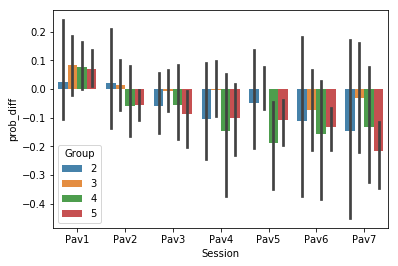

In [54]:
#plt.figure(figsize=(25,20))
sns.barplot(x = 'Session', y = 'prob_diff', hue = 'Group', data = PCA_group, alpha=0.9)
#plt.title('Q1: How often do you have a drink containing alcohol?', fontsize = 50)
#plt.ylabel('Count', fontsize=60)
#plt.yticks(fontsize = 30)
#plt.xlabel('Score', fontsize=60)
#plt.xticks(fontsize = 30)
#plt.legend(loc = 'upper right', fontsize=30)
#plt.text(3.2, 32.6, 'p < .045 ', fontsize=30)
plt.show()
#plt.savefig('AUDIT-C_q1.jpeg')